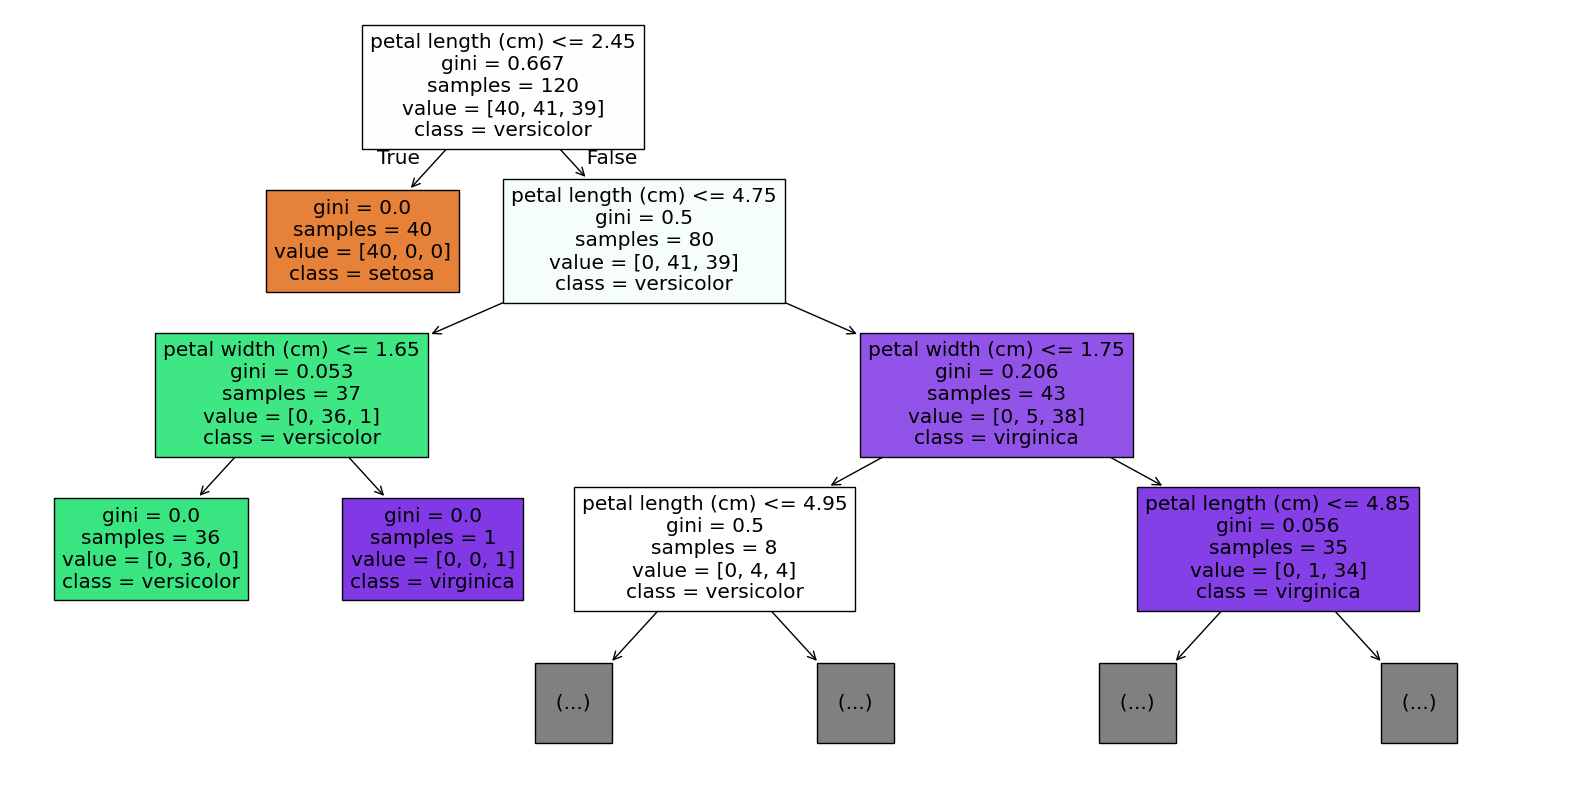

===== 决策树文本规则 =====
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|  

In [2]:
# ==============================
# 1️⃣ 导入库并加载 Iris 数据集
# ==============================
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================
# 2️⃣ 训练决策树
# ==============================
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# ==============================
# 3️⃣ 绘制树结构（前 3 层）
# ==============================
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=iris.target_names, filled=True, max_depth=3)
plt.show()

# ==============================
# 4️⃣ 文本输出完整树
# ==============================
tree_rules = export_text(clf, feature_names=list(X.columns))
print("===== 决策树文本规则 =====")
print(tree_rules)

# ==============================
# 5️⃣ 自动输出观察信息（改进版）
# ==============================
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

print("\n===== 自动观察结果 =====")

def describe_node(node_id):
    """根据节点是否叶子输出描述"""
    if feature[node_id] == -2:
        # 叶子节点
        # 取每个类别的样本数最多的类别
        value_counts = clf.tree_.value[node_id][0]
        class_id = value_counts.argmax()
        class_name = iris.target_names[class_id]
        return f"叶子节点，类别: {class_name}"
    else:
        feat_name = X.columns[feature[node_id]]
        thresh = threshold[node_id]
        return f"分裂特征: {feat_name}, 阈值: {thresh:.2f}"

# 根节点
print(f"1️⃣ 根节点: {describe_node(0)}")

# 左子节点
left_node = children_left[0]
print(f"2️⃣ 左子节点: {describe_node(left_node)}")

# 右子节点
right_node = children_right[0]
print(f"3️⃣ 右子节点: {describe_node(right_node)}")


1️⃣ 根节点: 分裂特征: petal length (cm), 阈值: 2.45
2️⃣ 左子节点: 叶子节点，类别: setosa
3️⃣ 右子节点: 分裂特征: petal length (cm), 阈值: 4.75

2️⃣ Iris 数据集特征分析

在 Iris 数据集中：

类别	花瓣长度 (petal length)	花瓣宽度 (petal width)	萼片长度	萼片宽度
Setosa	    1.0 – 1.9	        0.1 – 0.6	        4.3–5.8	    2.3–4.4
Versicolor	3.0 – 5.1	        1.0 – 1.8	        4.9–7.0	    2.0–3.4
Virginica	4.5 – 6.9	        1.4 – 2.5	        4.9–7.9	    2.2–3.8

Setosa 的花瓣明显短（≤ 2.0 cm）

Versicolor 和 Virginica 的花瓣长度重叠在 3–7 cm

花瓣长度对区分 Setosa 和其他两类非常有效

3️⃣ 决策树为什么选择 petal length 根节点

根节点要分裂尽可能多的样本，使子节点纯度高

检查各特征：

petal length：

阈值 2.45 cm：Setosa 完全分开 → 左子树纯度 100%

右子树是 Versicolor + Virginica → 也能进一步分裂

信息增益最大 → 被选作根节点

其他特征（如 sepal length/width 或 petal width）：

分裂后纯度不如 petal length

无法一次性把 Setosa 完全分开

所以决策树会优先选择 petal length 作为根节点。

4️⃣ 小结

根节点特征 = 信息增益最大

petal length 能把 Setosa 完全分离 → 纯度最高

因此自动成为根节点，剩余样本再由右子树继续分裂

1️⃣ 根节点最先分裂的特征

特征：petal length (cm)（花瓣长度）

原因：它能最大化信息增益，把 Setosa（类别 0）完全分开。

2️⃣ 根节点分裂阈值大致是多少

阈值：2.45 cm

解释：小于等于 2.45 → 左子树（纯 Setosa）；大于 2.45 → 右子树（Versicolor + Virginica）。

3️⃣ 子树的分裂结构情况

左子树：

是叶子节点，类别 0（Setosa），不再分裂。

右子树：

二级节点：petal length (cm) <= 4.75

左分支再根据 petal width (cm) <= 1.65 分裂 → 类别 1 / 类别 2

右分支继续判断更深特征（petal length、petal width、sepal width 等）

总体结构：右子树继续按花瓣长度和宽度分裂，逐步区分 Versicolor（类别 1）和 Virginica（类别 2）。